In [18]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras


In [7]:
trainData = pd.read_csv("Data/train.csv")
testData = pd.read_csv("Data/test.csv")

In [8]:
trainDataSmall = trainData[trainData.columns[9900:10002]]
testDataSmall = testData[testData.columns[9900:10001]]

train_df = trainData
test_df = testData

trainDataClass = train_df["Outcome"]
trainDataIds = train_df["Id"]
trainDataFeatures = train_df.drop(columns = ["Outcome", "Id"])

testDataIds = test_df["Id"]
testDataFeatures = test_df.drop(columns = ["Id"])

There are 371397 NaNs
Class outcome 0 accounts for 16.7%
Class outcome 1 accounts for 20.2%
Class outcome 2 accounts for 25.4%
Class outcome 3 accounts for 37.7%


,count,mean,std,min,25%,50%,75%,max
Gene 1,1427.0,203.563420,59.951166,0.0,162.00,203.0,245.00,394.0
Gene 2,1424.0,43497.110253,13257.898487,0.0,34875.75,43697.0,52267.25,90978.0
Gene 3,1424.0,330.366573,90.843454,0.0,270.00,331.0,391.00,606.0
Gene 4,1428.0,241.135154,65.468817,0.0,198.75,239.0,286.00,493.0
Gene 5,1436.0,1217.438022,348.133107,90.0,975.00,1207.5,1446.25,2302.0
...,...,...,...,...,...,...,...,...
Gene 3998,1415.0,31343.093993,9077.064820,0.0,25184.00,31522.0,37223.50,64221.0
Gene 3999,1422.0,5.962729,1.993484,0.0,5.00,6.0,7.00,12.0
Gene 4000,1432.0,54788.787709,14358.277174,9460.0,44698.75,55209.0,64311.25,97776.0
Outcome,1520.0,1.840789,1.105814,0.0,1.00,2.0,3.00,3.0


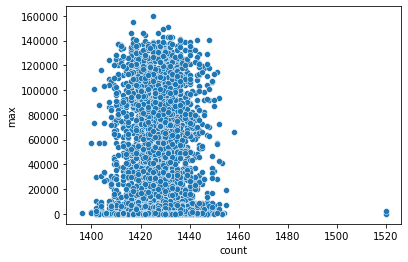

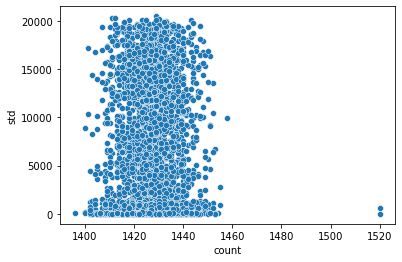

In [11]:
# exercise 2

print(f"There are {trainData.isna().sum().sum()} NaNs")
outcomes = trainData["Outcome"]
for i in range(4):
   print(f"Class outcome {i} accounts for {(outcomes == i).sum()/len(trainData)*100:.1f}%")
summary = trainData.describe()
display(summary.T)
sns.scatterplot(data = summary.T, x = "count", y = "max")
plt.show()
sns.scatterplot(data = summary.T, x = "count", y = "std")
plt.show()

In [117]:

trainData0 = trainData[trainData["Outcome"] == 0]
trainData1 = trainData[trainData["Outcome"] == 1]
trainData2 = trainData[trainData["Outcome"] == 2]
trainData3 = trainData[trainData["Outcome"] == 3]

datasets = [trainData0, trainData1, trainData2, trainData3]

leastAmount = (trainData[trainData["Outcome"] == 0].shape)[0]

changedSets = [trainData0, None, None, None]
for n in range(1,4):
    dataset = datasets[n]
    dataset.index = range(dataset.shape[0])
    indices = np.random.choice(dataset.shape[0], leastAmount, replace=False)
    dataset = dataset.iloc[indices]
    dataset.index = range(dataset.shape[0])
    changedSets[n] = dataset
datasets = changedSets

trainDataDownSampled = pd.concat([datasets[0], datasets[1], datasets[2], datasets[3]], axis=0)


# print(f"There are {trainDataDownSampled.isna().sum().sum()} NaNs")
# outcomes = trainDataDownSampled["Outcome"]
# for i in range(4):
#    print(f"Class outcome {i} accounts for {(outcomes == i).sum()/len(trainDataDownSampled)*100:.1f}%")
# summary = trainDataDownSampled.describe()
# display(summary.T)
# sns.scatterplot(data = summary.T, x = "count", y = "max")
# plt.show()
# sns.scatterplot(data = summary.T, x = "count", y = "std")
# plt.show()


train_df = trainDataDownSampled
test_df = testData

trainDataClass = train_df["Outcome"]
trainDataIds = train_df["Id"]
trainDataFeatures = train_df.drop(columns = ["Outcome", "Id"])

testDataIds = test_df["Id"]
testDataFeatures = test_df.drop(columns = ["Id"])

In [118]:
# exercise 3
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(trainDataFeatures, trainDataClass, trainDataIds, test_size = .2, train_size = .8, random_state=24)

e3_model = Pipeline([
    ("Scaling", StandardScaler()), 
    ("Imputing", KNNImputer()), 
    ("Regression", LogisticRegression())], 
    verbose = True)

e3_model.fit(X_train, y_train)

# get model predictions on test set and output to .csv
ids = pd.DataFrame(testDataIds, columns=["Id"])
e3_outcome = pd.DataFrame(e3_model.predict(testDataFeatures), columns=["Outcome"])
ids.index = range(len(e3_outcome))
e3_outcome = pd.concat([ids, e3_outcome], axis=1)
display(e3_outcome)
e3_outcome.to_csv("e3_outcome.csv", index=False)


[Pipeline] ........... (step 1 of 3) Processing Scaling, total=   0.3s
[Pipeline] .......... (step 2 of 3) Processing Imputing, total=  26.3s
[Pipeline] ........ (step 3 of 3) Processing Regression, total=   2.4s


,Id,Outcome
0,473,2
1,273,0
2,1885,1
3,629,3
4,609,3
...,...,...
475,1182,1
476,978,0
477,1716,3
478,766,2


[Pipeline] ........... (step 1 of 2) Processing Scaling, total=   0.4s
[Pipeline] .......... (step 2 of 2) Processing Imputing, total= 1.2min
PC1 represents 0.41% of the variance.
Gene 662 is the most contributing feature for PC1.

PC2 represents 0.40% of the variance.
Gene 1983 is the most contributing feature for PC2.



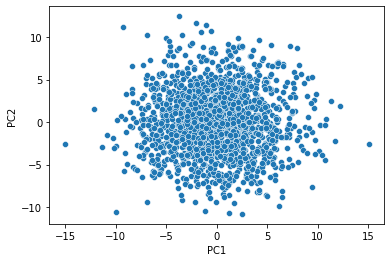

[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.2s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=  54.6s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   1.0s
[Pipeline] ........ (step 4 of 4) Processing Regression, total=   0.1s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.2s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=  53.1s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.7s
[Pipeline] ........ (step 4 of 4) Processing Regression, total=   0.1s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.2s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=  54.7s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.7s
[Pipeline] ........ (step 4 of 4) Processing Regression, total=   0.0s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.2s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=  51.7s
[Pipel

,Id,Outcome
0,473,3
1,273,3
2,1885,3
3,629,3
4,609,3
...,...,...
475,1182,3
476,978,3
477,1716,3
478,766,3


In [20]:
# exercise 4

# first just PCA
# data normalization pipeline
e4_normalized = Pipeline([
    ("Scaling", StandardScaler()), 
    ("Imputing", KNNImputer())], 
    verbose = True)
trainNormalized = e4_normalized.fit_transform(trainDataFeatures, trainDataClass)

pcaModel = PCA(n_components = 2)
e4_pca_data = pd.DataFrame(pcaModel.fit_transform(trainNormalized, trainDataClass), columns =["PC1", "PC2"])
pcs_var = pcaModel.explained_variance_ratio_
for i in range(2):
    print(f"PC{i+1} represents {(pcs_var[i]*100):.2f}% of the variance.")
    mapping = (np.where(pcaModel.components_[i].max()==pcaModel.components_[i], True, False))
    gene = (trainDataFeatures.columns[mapping])
    print(f"{gene[0]} is the most contributing feature for PC{i+1}.\n")
sns.scatterplot(data = e4_pca_data, x="PC1", y="PC2")
plt.show()

# pipeline with PCA
e4_model = Pipeline([
    ("Scaling", StandardScaler()), 
    ("Imputing", KNNImputer()),
    ("PCA", PCA(n_components = 200)),
    ("Regression", LogisticRegression())], 
    verbose = True)

cross_val = cross_validate(e4_model, trainDataFeatures, trainDataClass, cv = 10)

scores = cross_val["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")

e4_model.fit(trainDataFeatures, trainDataClass)

# get model predictions on test set and output to .csv
ids = pd.DataFrame(testDataIds, columns=["Id"])
e4_outcome = pd.DataFrame(e4_model.predict(testDataFeatures), columns=["Outcome"])
ids.index = range(len(e4_outcome))
e4_outcome = pd.concat([ids, e4_outcome], axis=1)
display(e4_outcome)
e4_outcome.to_csv("e4_outcome.csv", index=False)

In [51]:
# exercise 6
e6_model = Pipeline([
    ("Scaling", StandardScaler()),
    ("Imputation", KNNImputer()),
    ("PCA", PCA(n_components=200)),
    ("RandomForrest", RandomForestClassifier())],
    verbose=True)

e6_cv_output = cross_validate(e6_model, trainDataFeatures, trainDataClass, cv = 10)

scores = e6_cv_output["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")

e6_model.fit(trainDataFeatures, trainDataClass)

# get model predictions on test set and output to .csv
ids = pd.DataFrame(testDataIds, columns=["Id"])
e6_outcome = pd.DataFrame(e6_model.predict(testDataFeatures), columns=["Outcome"])
ids.index = range(len(e6_outcome))
e6_outcome = pd.concat([ids, e6_outcome], axis=1)
display(e6_outcome)
e6_outcome.to_csv("e6_outcome.csv", index=False)

[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.4s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total=  59.7s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   1.1s
[Pipeline] ..... (step 4 of 4) Processing RandomForrest, total=   3.0s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.2s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total= 1.2min
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.8s
[Pipeline] ..... (step 4 of 4) Processing RandomForrest, total=   1.8s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.2s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total= 1.0min
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.8s
[Pipeline] ..... (step 4 of 4) Processing RandomForrest, total=   1.9s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.3s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total= 1.3min
[Pipel

,Id,Outcome
0,473,3
1,273,3
2,1885,3
3,629,3
4,609,3
...,...,...
475,1182,3
476,978,3
477,1716,3
478,766,3


In [21]:
# exercise 8

def neural_net():
    model = Sequential([
        Dense(30, activation="relu"),
        Dense(20, activation="relu"),
        Dense(10, activation="relu"),
        Dense(4, activation=keras.activations.softmax)
    ])
    model.compile(
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    return model

dense_net_pipe = Pipeline([
    ("Scaling", StandardScaler()),
    ("Imputation", KNNImputer()),
    ("PCA", PCA(n_components=200)),
    ("DenseNet", KerasClassifier(build_fn=neural_net, verbose=0))],
    verbose=True)

e8_cv_output = cross_validate(dense_net_pipe, trainDataFeatures, trainDataClass, cv=10, return_train_score=True)


/var/folders/v5/n_y2gqg51cgd0xj05l2c_c7h0000gn/T/ipykernel_6592/1685860185.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  ("DenseNet", KerasClassifier(build_fn=neural_net, verbose=0))],


[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.8s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total=   1.1s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   2.0s
[Pipeline] .......... (step 4 of 4) Processing DenseNet, total=   2.1s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.3s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total=   0.3s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   1.2s
[Pipeline] .......... (step 4 of 4) Processing DenseNet, total=   1.4s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.3s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total=   0.3s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   1.2s
[Pipeline] .......... (step 4 of 4) Processing DenseNet, total=   1.4s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.3s
[Pipeline] ........ (step 2 of 4) Processing Imputation, total=   0.2s
[Pipel

In [26]:
display(e8_cv_output)
scores = e8_cv_output["test_score"]
print(f"The mean cross-validation accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")
"""it is 'so much' better"""

{'fit_time': array([6.28660178, 3.28534293, 3.24922299, 5.49069905, 3.0823729 ,
        3.07962298, 3.91343832, 3.97932625, 4.17541814, 3.58819199]),
 'score_time': array([0.74127531, 0.47551107, 0.41399503, 0.42026424, 0.42754102,
        0.42734599, 0.48678493, 0.46319175, 0.41339183, 0.52518606]),
 'test_score': array([0.21710527, 0.29605263, 0.32894737, 0.23026316, 0.2631579 ,
        0.22368421, 0.24342105, 0.27631578, 0.30921054, 0.32894737]),
 'train_score': array([0.36038011, 0.36257309, 0.40350878, 0.37061402, 0.37646198,
        0.34429824, 0.3128655 , 0.36622807, 0.40204677, 0.36622807])}

The mean cross-validation accuracy is: 0.272 +/- 0.041


"it is 'so much' better"

In [ ]:
e8_model.fit(trainDataFeatures, trainDataClass)

# get model predictions on test set and output to .csv
ids = pd.DataFrame(testDataIds, columns=["Id"])
e8_outcome = pd.DataFrame(e_model.predict(testDataFeatures), columns=["Outcome"])
ids.index = range(len(e6_outcome))
e6_outcome = pd.concat([ids, e6_outcome], axis=1)
display(e6_outcome)
e6_outcome.to_csv("e6_outcome.csv", index=False)